<a href="https://colab.research.google.com/github/rndrpp/Improving-Employee-Retention-by-Predicting-Employee-Attrition-Using-Machine-Learning/blob/main/Improving_Employee_Retention_by_Predicting_Employee_Attrition_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import waterfall_chart
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn import over_sampling

In [ ]:
# !pip install matplotlib --upgrade

In [ ]:
# !pip install waterfallcharts

In [ ]:
df = pd.read_csv('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv')

df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


# Data Preprocessing

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

## Handling Missing Values

In [ ]:
df_clean.isnull().mean()*100

Username                               0.000000
EnterpriseID                           0.000000
StatusPernikahan                       0.000000
JenisKelamin                           0.000000
StatusKepegawaian                      0.000000
Pekerjaan                              0.000000
JenjangKarir                           0.000000
PerformancePegawai                     0.000000
AsalDaerah                             0.000000
HiringPlatform                         0.000000
SkorSurveyEngagement                   0.000000
SkorKepuasanPegawai                    1.742160
JumlahKeikutsertaanProjek              1.045296
JumlahKeterlambatanSebulanTerakhir     0.348432
JumlahKetidakhadiran                   2.090592
NomorHP                                0.000000
Email                                  0.000000
TingkatPendidikan                      0.000000
PernahBekerja                          0.000000
IkutProgramLOP                        89.895470
AlasanResign                          22

In [ ]:
df_clean['SkorKepuasanPegawai'].describe()

count    282.000000
mean       3.904255
std        0.913355
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: SkorKepuasanPegawai, dtype: float64

In [ ]:
df_clean['JumlahKeikutsertaanProjek'].describe()

count    284.000000
mean       1.179577
std        2.294441
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: JumlahKeikutsertaanProjek, dtype: float64

In [ ]:
df_clean['JumlahKeterlambatanSebulanTerakhir'].describe()

count    286.000000
mean       0.412587
std        1.275016
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: JumlahKeterlambatanSebulanTerakhir, dtype: float64

In [ ]:
df_clean['JumlahKetidakhadiran'].describe()

count    281.000000
mean      10.448399
std        6.902252
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       55.000000
Name: JumlahKetidakhadiran, dtype: float64

In [ ]:
df_clean['AlasanResign'].unique().tolist()

['masih_bekerja',
 'toxic_culture',
 'jam_kerja',
 'ganti_karir',
 'tidak_bahagia',
 'internal_conflict',
 'Product Design (UI & UX)',
 'kejelasan_karir',
 'tidak_bisa_remote',
 'apresiasi',
 nan,
 'leadership']

In [ ]:
print(f'Jumlah null/missing value sebelum handling: {df_clean.isnull().sum().sum()}')

df_clean['SkorKepuasanPegawai'].fillna(
    df_clean['SkorKepuasanPegawai'].mean(), inplace = True)
df_clean['JumlahKeikutsertaanProjek'].fillna(
    df_clean['JumlahKeikutsertaanProjek'].median(), inplace = True)
df_clean['JumlahKeterlambatanSebulanTerakhir'].fillna(
    df_clean['JumlahKeterlambatanSebulanTerakhir'].median(), inplace = True)
df_clean['JumlahKetidakhadiran'].fillna(
    df_clean['JumlahKetidakhadiran'].median(), inplace = True)
df_clean = df_clean.drop('IkutProgramLOP', axis = 1)
df_clean['AlasanResign'].fillna('tidak_diketahui', inplace = True)
print(f'Jumlah null/missing value setelah handling: {df_clean.isnull().sum().sum()}')

Jumlah null/missing value sebelum handling: 339
Jumlah null/missing value setelah handling: 0


In [ ]:
cats = df_clean.select_dtypes(include='object').columns.tolist()
for cat in cats:
    print(f'{cat} total unique value: {df_clean[cat].nunique()}')
    print(f'{cat} values: {df_clean[cat].unique().tolist()} ', '\n')

Username total unique value: 285
Username values: ['spiritedPorpoise3', 'jealousGelding2', 'pluckyMuesli3', 'stressedTruffle1', 'shyTermite7', 'emptyMacaw4', 'madZebra1', 'cynicalMandrill7', 'lyingMussel8', 'enviousMoth4', 'puzzledCake4', 'grizzledSnipe7', 'yearningBagels0', 'sheepishSheep9', 'madWildfowl7', 'enviousSalami4', 'pacifiedRaisins7', 'wrathfulMagpie6', 'hushedSeahorse7', 'guiltyMoth4', 'peacefulCoati5', 'dejectedPolenta7', 'needfulLeopard2', 'offendedIguana0', 'pluckyHoopoe3', 'needySyrup4', 'forsakenOwl1', 'pluckyApples4', 'guiltySnail8', 'grizzledFlamingo9', 'worriedSyrup7', 'somberBoars0', 'giddyMallard9', 'madFerret4', 'mereCaribou1', 'decimalAbalone6', 'blissfulMussel3', 'ardentLapwing0', 'peskyTeal7', 'blissfulHyena1', 'solidMacaw1', 'cautiousPolenta9', 'excludedPorpoise4', 'shamefulIguana0', 'shySyrup7', 'forsakenCow7', 'grumpyFish4', 'wingedPorpoise5', 'soreCaribou0', 'needfulCardinal0', 'giddyCheetah9', 'hushedOil9', 'crummyPudding5', 'selfishBasmati2', 'adoringCar

In [ ]:
df_clean['PernahBekerja'] = df_clean['PernahBekerja'].replace(to_replace='yes', value='1')

In [ ]:
df_clean['PernahBekerja'].unique().tolist()

['1']

In [ ]:
df_clean = df_clean.drop('PernahBekerja', axis = 1)

In [ ]:
print(f'Jumlah duplicate sebelum handling: {df_clean.duplicated().sum()}')
df_clean.drop_duplicates(inplace=True)
print(f'Jumlah duplicate setelah handling: {df_clean.duplicated().sum()}')

Jumlah duplicate sebelum handling: 0
Jumlah duplicate setelah handling: 0


# Annual Report on Employee Number Changes

In [ ]:
df_processed = df_clean.copy()

In [ ]:
df_processed['TahunHiring'] = pd.to_datetime(df_processed['TanggalHiring'] ).dt.year.astype(str)
df_processed['TahunResign'] = pd.to_datetime(df_processed['TanggalResign'], errors='coerce').dt.strftime("%Y")
df_processed['TahunResign'].fillna('-', inplace = True)


In [ ]:
hiring_by_year = df_processed.groupby('TahunHiring').agg({'Username': 'count'}).reset_index()

hiring_by_year

,TahunHiring,Username
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [ ]:
resign_by_year = df_processed.groupby('TahunResign').agg({'Username': 'count'}).reset_index()

resign_by_year

,TahunResign,Username
0,-,198
1,2013,5
2,2014,12
3,2015,8
4,2016,8
5,2017,19
6,2018,26
7,2019,5
8,2020,6


In [ ]:
by_year=pd.merge(hiring_by_year, resign_by_year, left_on='TahunHiring', right_on='TahunResign', how='outer')

In [ ]:
by_year

,TahunHiring,Username_x,TahunResign,Username_y
0,2006,1.0,NaN,NaN
1,2007,2.0,NaN,NaN
2,2008,2.0,NaN,NaN
3,2009,7.0,NaN,NaN
4,2010,8.0,NaN,NaN
5,2011,76.0,NaN,NaN
6,2012,41.0,NaN,NaN
7,2013,43.0,2013,5.0
8,2014,56.0,2014,12.0
9,2015,31.0,2015,8.0


In [ ]:
by_year.rename(columns = {'Username_x': 'TotalHiring', 'Username_y': 'TotalResign'}, inplace = True)
by_year['TahunHiring'].fillna(by_year['TahunResign'], inplace=True)
by_year['TahunResign'].fillna(by_year['TahunHiring'], inplace=True)
by_year['TotalHiring'].fillna(0, inplace=True)
by_year['TotalResign'].fillna(0, inplace=True)
by_year.rename(columns = {'TahunHiring': 'Tahun'}, inplace = True)
by_year = by_year.drop('TahunResign', axis = 1)

by_year

,Tahun,TotalHiring,TotalResign
0,2006,1.0,0.0
1,2007,2.0,0.0
2,2008,2.0,0.0
3,2009,7.0,0.0
4,2010,8.0,0.0
5,2011,76.0,0.0
6,2012,41.0,0.0
7,2013,43.0,5.0
8,2014,56.0,12.0
9,2015,31.0,8.0


In [ ]:
by_year.drop(by_year.index[by_year['Tahun'] == '-'], inplace = True)

In [ ]:
by_year['TotalKaryawan'] = by_year['TotalHiring'].sub(by_year['TotalResign']).cumsum().add(0)
by_year['TotalPerubahan'] = by_year['TotalHiring'].sub(by_year['TotalResign'])

In [ ]:
by_year['Tahun'] = by_year['Tahun'].astype(int)
by_year['TotalHiring'] = by_year['TotalHiring'].astype(int)
by_year['TotalResign'] = by_year['TotalResign'].astype(int)
by_year['TotalKaryawan'] = by_year['TotalKaryawan'].astype(int)

In [ ]:
by_year

,Tahun,TotalHiring,TotalResign,TotalKaryawan,TotalPerubahan
0,2006,1,0,1,1.0
1,2007,2,0,3,2.0
2,2008,2,0,5,2.0
3,2009,7,0,12,7.0
4,2010,8,0,20,8.0
5,2011,76,0,96,76.0
6,2012,41,0,137,41.0
7,2013,43,5,175,38.0
8,2014,56,12,219,44.0
9,2015,31,8,242,23.0


## Waterfall Chart

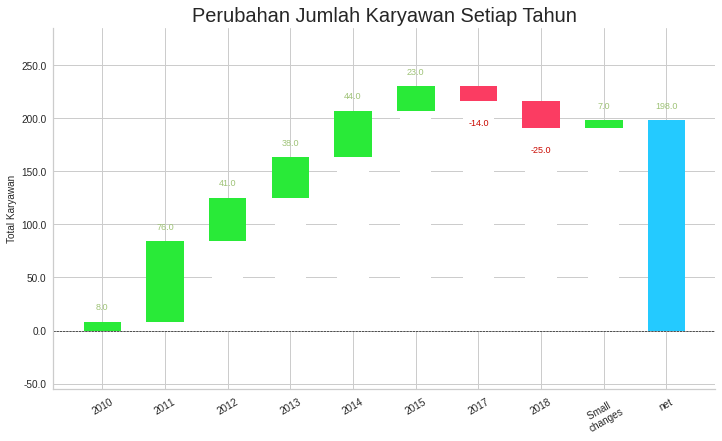

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
waterfall_chart.plot(by_year.Tahun, by_year['TotalPerubahan'],
                     other_label='Small \nchanges',
                     threshold=0.1)
plt.title('Perubahan Jumlah Karyawan Setiap Tahun', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Total Karyawan', fontsize=10)
sns.despine()
plt.show()

# Resign Reason Analysis for Employee Attrition Management Strategy

In [ ]:
df_resigned = df_processed.loc[df_processed['TahunResign'] != '-']
df_current = df_processed.loc[df_processed['TahunResign'] == '-']

In [ ]:
resigned_by_job = df_resigned.groupby('Pekerjaan').agg({'Username': 'count'}).reset_index()

resigned_by_job

,Pekerjaan,Username
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


In [ ]:
current_by_job = df_current.groupby('Pekerjaan').agg({'Username': 'count'}).reset_index()

current_by_job

,Pekerjaan,Username
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [ ]:
by_job = pd.merge(resigned_by_job, current_by_job, left_on = 'Pekerjaan', right_on = 'Pekerjaan', how = 'outer')
by_job.rename(columns = {'Username_x': 'TotalResign', 'Username_y': 'TotalCurrent'}, inplace = True)

by_job

,Pekerjaan,TotalResign,TotalCurrent
0,Data Analyst,8.0,8
1,Data Engineer,3.0,7
2,Product Design (UI & UX),9.0,15
3,Product Manager,6.0,11
4,Software Engineer (Android),7.0,17
5,Software Engineer (Back End),28.0,81
6,Software Engineer (Front End),28.0,44
7,DevOps Engineer,NaN,3
8,Digital Product Manager,NaN,2
9,Machine Learning Engineer,NaN,2


In [ ]:
by_job['TotalResign'].fillna(0, inplace = True)
by_job['TotalResign'] = by_job['TotalResign'].astype(int)

In [ ]:
by_job

,Pekerjaan,TotalResign,TotalCurrent
0,Data Analyst,8,8
1,Data Engineer,3,7
2,Product Design (UI & UX),9,15
3,Product Manager,6,11
4,Software Engineer (Android),7,17
5,Software Engineer (Back End),28,81
6,Software Engineer (Front End),28,44
7,DevOps Engineer,0,3
8,Digital Product Manager,0,2
9,Machine Learning Engineer,0,2


In [ ]:
by_job['TotalEmployee'] = by_job['TotalResign'].add(by_job['TotalCurrent'])
by_job['PersentaseEmployee'] = by_job['TotalCurrent'].div(by_job['TotalEmployee']).mul(100).round(decimals = 1)
by_job

,Pekerjaan,TotalResign,TotalCurrent,TotalEmployee,PersentaseEmployee
0,Data Analyst,8,8,16,50.0
1,Data Engineer,3,7,10,70.0
2,Product Design (UI & UX),9,15,24,62.5
3,Product Manager,6,11,17,64.7
4,Software Engineer (Android),7,17,24,70.8
5,Software Engineer (Back End),28,81,109,74.3
6,Software Engineer (Front End),28,44,72,61.1
7,DevOps Engineer,0,3,3,100.0
8,Digital Product Manager,0,2,2,100.0
9,Machine Learning Engineer,0,2,2,100.0


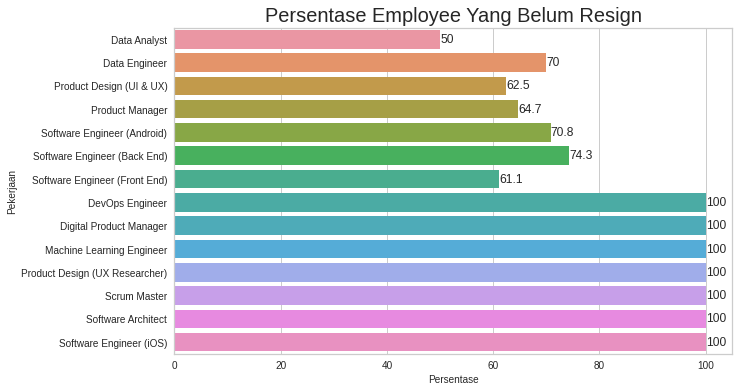

In [ ]:
ax = sns.barplot(data = by_job, x = 'PersentaseEmployee', y ='Pekerjaan')

plt.title('Persentase Employee Yang Belum Resign', fontsize = 20)
plt.ylabel('Pekerjaan', fontsize = 10)
plt.xlabel('Persentase', fontsize = 10)

for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
resigned_da = df_processed.loc[(df_processed['Pekerjaan'] == 'Data Analyst') & (df_processed['TahunResign'] != '-')]

resigned_da

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018
18,hushedSeahorse7,111202,Bercerai,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Diversity_Job_Fair,...,+6281212698xxx,hushedSeahorse7404@icloud.com,Sarjana,internal_conflict,1968-05-30,2012-04-02,2017-02-05,2017-09-12,2012,2017
86,sincereGatorade8,111089,Menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,...,+6281225029xxx,sincereGatorade8842@icloud.com,Sarjana,toxic_culture,1987-06-14,2016-10-02,2020-01-08,2017-3-15,2016,2017
102,brainyFish3,111083,Menikah,Pria,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Barat,Google_Search,...,+6285960968xxx,brainyFish3571@hotmail.com,Sarjana,toxic_culture,1984-05-09,2012-04-02,2014-2-20,2018-06-08,2012,2018
106,troubledThrushe9,101192,-,Wanita,FullTime,Data Analyst,Freshgraduate_program,Bagus,Jakarta Barat,CareerBuilder,...,+6281801928xxx,troubledThrushe9146@proton.com,Sarjana,toxic_culture,1987-01-07,2013-01-07,2020-1-30,2014-8-19,2013,2014
108,jealousIguana3,111209,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Timur,CareerBuilder,...,+6283373813xxx,jealousIguana3026@gmail.com,Sarjana,toxic_culture,1976-09-22,2015-3-30,2020-1-21,2014-8-19,2015,2014
233,jumpyBuck8,100317,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Utara,Diversity_Job_Fair,...,+6287731679xxx,jumpyBuck8498@outlook.com,Magister,toxic_culture,1970-02-11,2009-07-06,2020-1-25,2015-06-05,2009,2015
239,finickySwift5,105296,Belum_menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,Google_Search,...,+6281213075xxx,finickySwift5808@icloud.com,Magister,internal_conflict,1989-09-08,2011-07-11,2017-02-01,2017-6-25,2011,2017


In [ ]:
agg_da = resigned_da.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).agg({'Username' : 'count'}).reset_index()

agg_da

,JenjangKarir,PerformancePegawai,AlasanResign,Username
0,Freshgraduate_program,Bagus,toxic_culture,1
1,Freshgraduate_program,Biasa,internal_conflict,1
2,Freshgraduate_program,Biasa,toxic_culture,1
3,Freshgraduate_program,Sangat_bagus,internal_conflict,1
4,Freshgraduate_program,Sangat_bagus,toxic_culture,3
5,Freshgraduate_program,Sangat_kurang,toxic_culture,1


In [ ]:
import plotly.express as px

fig = px.sunburst(agg_da, path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'], values='Username')

fig.show()

# Build an Automated Resignation Behavior Prediction using Machine Learning

In [ ]:
df_model = df_processed.copy()

In [ ]:
df_model = df_model.drop(columns = ['Username', 'EnterpriseID', 'JenisKelamin',  
                                  'AsalDaerah', 'HiringPlatform', 
                                  'NomorHP', 'Email',
                                  'TanggalLahir', 'TanggalHiring', 
                                  'TanggalPenilaianKaryawan', 'TanggalResign',
                                  'TahunHiring', 'TahunResign'], axis = 1)

df_model

,StatusPernikahan,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign
0,Belum_menikah,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,4,4.0,0.0,0.0,9.0,Magister,masih_bekerja
1,Belum_menikah,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,4,4.0,4.0,0.0,3.0,Sarjana,toxic_culture
2,Menikah,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,4,3.0,0.0,0.0,11.0,Magister,jam_kerja
3,Belum_menikah,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,3,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja
4,Belum_menikah,FullTime,Product Manager,Freshgraduate_program,Bagus,3,3.0,0.0,0.0,11.0,Sarjana,ganti_karir
...,...,...,...,...,...,...,...,...,...,...,...,...
282,Belum_menikah,FullTime,Data Engineer,Mid_level,Bagus,2,5.0,0.0,0.0,16.0,Sarjana,tidak_diketahui
283,-,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,4,5.0,0.0,0.0,11.0,Sarjana,jam_kerja
284,Menikah,FullTime,Software Engineer (Front End),Senior_level,Biasa,2,5.0,0.0,0.0,17.0,Sarjana,ganti_karir
285,Belum_menikah,FullTime,Software Engineer (Android),Mid_level,Bagus,4,5.0,0.0,0.0,20.0,Sarjana,kejelasan_karir


In [ ]:
df_model['Resign'] = df_model['AlasanResign'].apply(lambda x : 1 if x != 'masih_bekerja' else 0)

df_model

,StatusPernikahan,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,Resign
0,Belum_menikah,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,4,4.0,0.0,0.0,9.0,Magister,masih_bekerja,0
1,Belum_menikah,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,4,4.0,4.0,0.0,3.0,Sarjana,toxic_culture,1
2,Menikah,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,4,3.0,0.0,0.0,11.0,Magister,jam_kerja,1
3,Belum_menikah,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,3,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja,0
4,Belum_menikah,FullTime,Product Manager,Freshgraduate_program,Bagus,3,3.0,0.0,0.0,11.0,Sarjana,ganti_karir,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Belum_menikah,FullTime,Data Engineer,Mid_level,Bagus,2,5.0,0.0,0.0,16.0,Sarjana,tidak_diketahui,1
283,-,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,4,5.0,0.0,0.0,11.0,Sarjana,jam_kerja,1
284,Menikah,FullTime,Software Engineer (Front End),Senior_level,Biasa,2,5.0,0.0,0.0,17.0,Sarjana,ganti_karir,1
285,Belum_menikah,FullTime,Software Engineer (Android),Mid_level,Bagus,4,5.0,0.0,0.0,20.0,Sarjana,kejelasan_karir,1


In [ ]:
df_model['PerformancePegawai'].unique()

array(['Sangat_bagus', 'Sangat_kurang', 'Bagus', 'Biasa', 'Kurang'],
      dtype=object)

In [ ]:
performance_mapper = {"Sangat_kurang":1, "Kurang":2, "Biasa":3, "Bagus":4,
                      "Sangat_bagus":5}
education_mapper = {"Sarjana":1, "Magister":2, "Doktor":3}

df_model['PerformancePegawai'] = df_model['PerformancePegawai'].replace(
    performance_mapper)
df_model['TingkatPendidikan'] = df_model['TingkatPendidikan'].replace(
    education_mapper)

df_model

,StatusPernikahan,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,Resign
0,Belum_menikah,Outsource,Software Engineer (Back End),Freshgraduate_program,5,4,4.0,0.0,0.0,9.0,2,masih_bekerja,0
1,Belum_menikah,FullTime,Data Analyst,Freshgraduate_program,1,4,4.0,4.0,0.0,3.0,1,toxic_culture,1
2,Menikah,FullTime,Software Engineer (Front End),Freshgraduate_program,4,4,3.0,0.0,0.0,11.0,2,jam_kerja,1
3,Belum_menikah,Outsource,Software Engineer (Front End),Freshgraduate_program,4,3,3.0,0.0,4.0,6.0,1,masih_bekerja,0
4,Belum_menikah,FullTime,Product Manager,Freshgraduate_program,4,3,3.0,0.0,0.0,11.0,1,ganti_karir,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Belum_menikah,FullTime,Data Engineer,Mid_level,4,2,5.0,0.0,0.0,16.0,1,tidak_diketahui,1
283,-,FullTime,Product Design (UI & UX),Freshgraduate_program,3,4,5.0,0.0,0.0,11.0,1,jam_kerja,1
284,Menikah,FullTime,Software Engineer (Front End),Senior_level,3,2,5.0,0.0,0.0,17.0,1,ganti_karir,1
285,Belum_menikah,FullTime,Software Engineer (Android),Mid_level,4,4,5.0,0.0,0.0,20.0,1,kejelasan_karir,1


In [ ]:
df_model.describe()

,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,Resign
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,3.491289,3.101045,3.904255,1.167247,0.411150,10.439024,1.470383,0.540070
std,1.217196,0.836388,0.905336,2.285537,1.273018,6.829769,0.646395,0.499262
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3.000000,3.000000,3.000000,0.000000,0.000000,5.000000,1.000000,0.000000
50%,4.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000,1.000000
75%,5.000000,4.000000,5.000000,0.000000,0.000000,15.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,8.000000,6.000000,55.000000,3.000000,1.000000


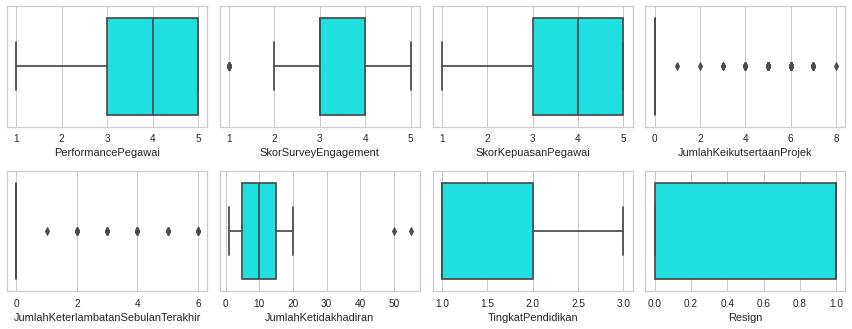

In [ ]:
nums = df_model.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(12, 18))
for i, num in enumerate(nums):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=df_model[num], color='cyan')
    plt.xlabel(num)
    plt.tight_layout()

In [ ]:
df_model = df_model.drop(columns = ['JumlahKeikutsertaanProjek', 
                                    'JumlahKeterlambatanSebulanTerakhir'], 
                         axis = 1)

outliers = df_model[(df_model['SkorSurveyEngagement']<2) | 
                    (df_model['JumlahKetidakhadiran']>20)].index

df_model.drop(outliers, inplace=True)

In [ ]:
dummies = ['StatusPernikahan', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir']
df_model = pd.get_dummies(df_model, columns = dummies, drop_first=True)

df_model = df_model.drop(columns=['AlasanResign','JumlahKetidakhadiran'], axis = 1)

In [ ]:
features = df_model.loc[:, df_model.columns != 'Resign'] 
target = df_model['Resign']

In [ ]:
X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_smote, y_smote = over_sampling.SMOTE('all', random_state=28).fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]
dec_tree_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
rand_for_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
kneighbors_params = [{"n_neighbors":3}, {"n_neighbors":5}]
naive_bayes_params = [{}]
svc_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]

modelclasses = [
    ["log regression", LogisticRegression, log_reg_params],
    ["decision tree", DecisionTreeClassifier, dec_tree_params],
    ["random forest", RandomForestClassifier, rand_for_params],
    ["k neighbors", KNeighborsClassifier, kneighbors_params],
    ["naive bayes", GaussianNB, naive_bayes_params],
    ["support vector machines", SVC, svc_params]
]

In [ ]:
insights = []
for modelname, Model, params_list in modelclasses:
    for params in params_list:
        model = Model(**params)
        model.fit(X_train_scaled, y_smote)
        score = model.score(X_test_scaled, y_test)
        insights.append((modelname, model, params, score))

In [ ]:
insights.sort(key=lambda x:x[-1], reverse=True)
for modelname, model, params, score in insights:
    print(modelname, params, score)

log regression {'C': 0.01} 0.6727272727272727
log regression {'C': 0.1} 0.6545454545454545
log regression {'C': 1} 0.6545454545454545
log regression {'C': 10} 0.6545454545454545
support vector machines {'C': 0.01} 0.5818181818181818
support vector machines {'C': 0.1} 0.5818181818181818
support vector machines {'C': 1} 0.5818181818181818
random forest {'criterion': 'entropy'} 0.5636363636363636
random forest {'criterion': 'gini'} 0.5454545454545454
decision tree {'criterion': 'entropy'} 0.5272727272727272
support vector machines {'C': 10} 0.509090909090909
naive bayes {} 0.4909090909090909
decision tree {'criterion': 'gini'} 0.45454545454545453
k neighbors {'n_neighbors': 5} 0.41818181818181815
k neighbors {'n_neighbors': 3} 0.4


In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 200, max_depth=6, criterion='gini')
rfc1.fit(X_train_scaled, y_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_curve,precision_score, plot_roc_curve

pred=rfc1.predict(X_test_scaled)

print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.6


In [ ]:
def get_fp_tp(y, proba, threshold):
    """Return the number of false positives and true positives."""
    # source: https://towardsdatascience.com/roc-curve-explained-50acab4f7bd8
    # Classify into classes
    pred = pd.Series(np.where(proba>=threshold, 1, 0), 
                     dtype='category')
    pred.cat.set_categories([0,1], inplace=True)
    # Create confusion matrix
    confusion_matrix = pred.groupby([y, pred]).size().unstack()\
                           .rename(columns={0: 'pred_0', 
                                            1: 'pred_1'}, 
                                   index={0: 'actual_0', 
                                          1: 'actual_1'})
    false_positives = confusion_matrix.loc['actual_0', 'pred_1']
    true_positives = confusion_matrix.loc['actual_1', 'pred_1']
    return false_positives, true_positives

In [ ]:
thresholds = np.linspace(0,1,100)


In [ ]:
y_hat = rfc1.predict_proba(X_test_scaled)[:,1]

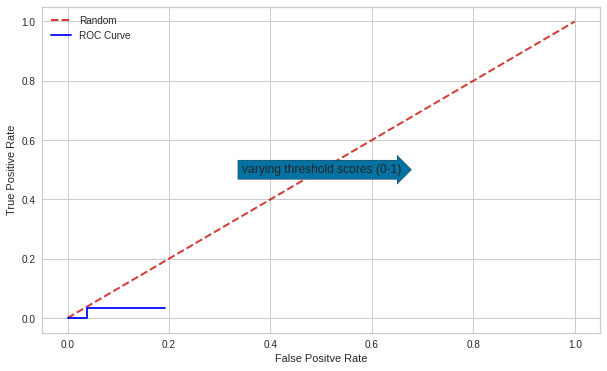

In [ ]:
# defining fpr and tpr
tpr = []
fpr = []
# defining positives and negatives
positives = np.sum(y_test==1)
negatives = np.sum(y_test==0)

# looping over threshold scores and getting the number of false positives and true positives
for th in thresholds:
    fp,tp = get_fp_tp(y_test, y_hat, th)
    tpr.append(tp/positives)
    fpr.append(fp/negatives)
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr, label="ROC Curve",color="blue")
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
y_pred_tree1 = rfc1.predict(X_test_scaled)
cf_matrix1 = confusion_matrix(y_test, y_pred_tree1)

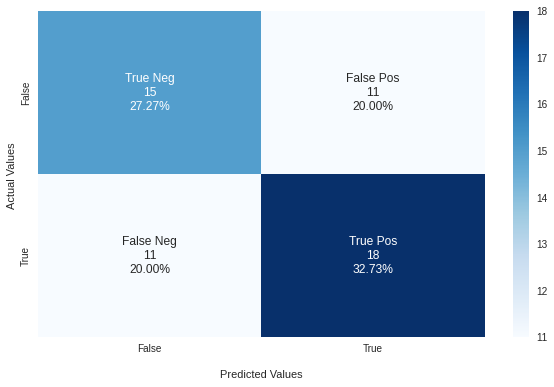

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix1.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix1.flatten()/np.sum(cf_matrix1)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix1, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# New section

In [ ]:
import shap 

explainer = shap.TreeExplainer(rfc1)

In [ ]:
y_test

194    1
160    0
34     0
80     1
170    0
145    0
263    1
176    0
41     0
10     1
273    1
87     0
214    1
61     0
197    1
208    1
191    1
124    1
91     0
222    1
23     0
190    1
130    0
252    1
96     0
204    1
77     0
241    1
79     0
280    1
93     1
250    1
123    0
88     0
212    1
186    0
211    1
166    0
272    1
157    1
161    1
118    0
9      0
277    1
285    1
100    0
95     1
187    1
270    1
66     0
8      0
209    1
167    0
182    0
59     0
Name: Resign, dtype: int64

In [ ]:
choosen_instance = X_test.loc[[194]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
choosen_instance = X_test.loc[[34]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

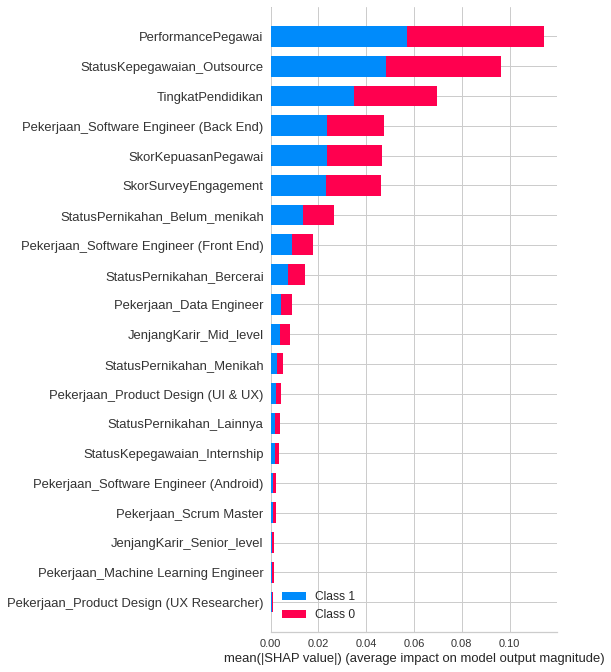

In [ ]:
shap.summary_plot(shap_values, X_train)